# Load libraries

In [1]:
library(docstring) ##documentation of R functions
library(ggplot2) ##pretty plots in R
library(cowplot) ##easy pretty ggplot figures
library(dplyr) ##rearranging df
library(tidyr) ##rearranging df
library(gridExtra) ## plotting mutliple figures on one plot
library(RColorBrewer) ##selecting colours from palettes
library(factoextra) ##visualize PCA results
library(extrafont)


Attaching package: ‘docstring’

The following object is masked from ‘package:utils’:

    ?

Warning message:
“package ‘cowplot’ was built under R version 3.5.2”
Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Warning message:
“package ‘dplyr’ was built under R version 3.5.2”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


# Summary of data on the Sequence Read Archive 

https://trace.ncbi.nlm.nih.gov/Traces/sra/sra.cgi?

In [3]:
sra <- read.csv("./data/sra_stats.csv")

In [4]:
sra$year <- sapply(strsplit(as.character(sra$date), "\\/"), "[[", 3)

In [5]:
head(sra)

date,bases,open_access_bases,bytes,open_access_bytes,year
06/05/2007,20304190150,20304190150,50496285115,50496285115,2007
04/04/2008,39753724527,39753724527,98578509466,98578509466,2008
04/05/2008,41358022149,41358022149,102560743983,102560743983,2008
04/09/2008,41807184131,41807184131,103698289223,103698289223,2008
04/15/2008,41932946619,41932946619,104004397361,104004397361,2008
04/17/2008,57328868847,57328868847,136684213042,136684213042,2008


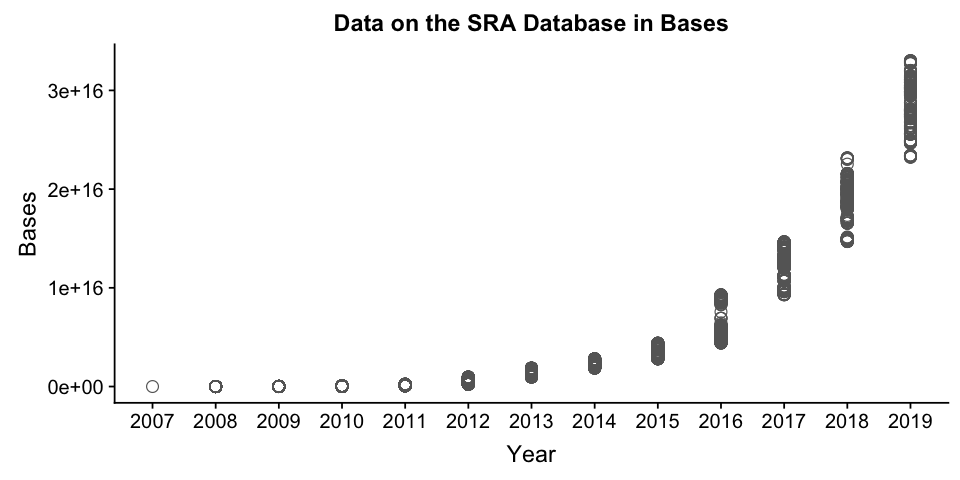

In [6]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot(sra, aes(year, bases)) +
    ylab("Bases") + xlab("Year") +
    ggtitle("Data on the SRA Database in Bases") +
    geom_point(size=3, shape=21,color="gray40") +
    theme_cowplot() 

In [8]:
##get years represented in the db as chr
years <- unique(sra$year)

##initialize an empty list
maxbases <- list()
maxbases_oa <- list()

##get the maximum bases per year
for (yr in 1:length(years)){
    
    ##get maximum bases by year
    tmp <- max((subset(sra, year == years[yr]))$bases, na.rm = TRUE)
    tmp_oa <- max((subset(sra, year == years[yr]))$open_access_bases, na.rm = TRUE)
    maxbases[years[yr]] <- tmp
    maxbases_oa[years[yr]] <- tmp_oa
    
}

In [9]:
maxbases_year <- cbind(as.data.frame(years),
                       t(as.data.frame(maxbases)),
                      t(as.data.frame(maxbases_oa)))

colnames(maxbases_year) <- c("year", "maxbases","open_access_maxbases")
maxbases_year

,year,maxbases,open_access_maxbases
X2007,2007,2.030419e+10,2.030419e+10
X2008,2008,2.250885e+12,2.250885e+12
X2009,2009,1.245912e+13,1.211726e+13
X2010,2010,7.100831e+13,6.023526e+13
X2011,2011,2.321088e+14,1.710610e+14
X2012,2012,9.616394e+14,3.969516e+14
X2013,2013,1.865310e+15,8.803710e+14
X2014,2014,2.806734e+15,1.560361e+15
X2015,2015,4.394047e+15,2.674544e+15
X2016,2016,9.285472e+15,4.184046e+15


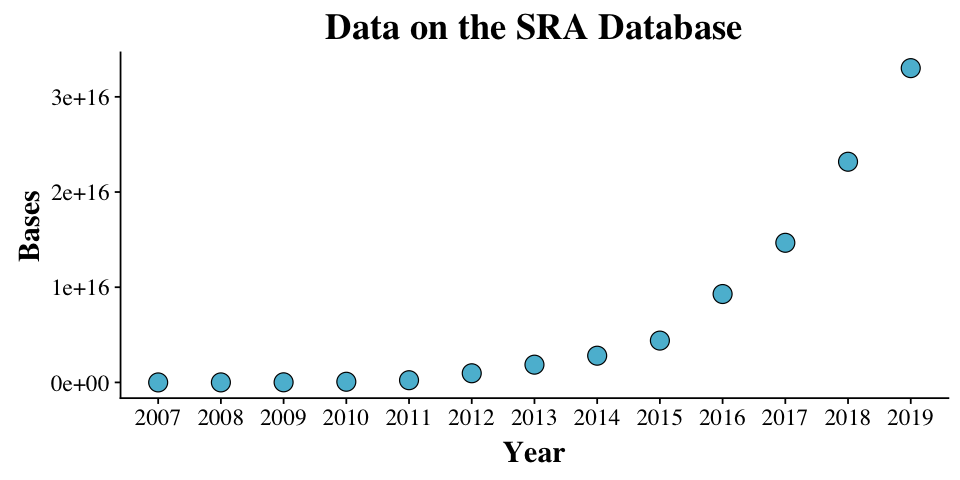

In [11]:
options(repr.plot.width=8, repr.plot.height=4)
sra_plot <- ggplot(maxbases_year, aes(year, maxbases)) +
                ylab("Bases") + xlab("Year") +
                ggtitle("Data on the SRA Database") +
                geom_point(size=5, shape=21,color="black", fill="#5BBCD6") + 
                theme_cowplot() +
            theme(plot.title = element_text(size = 22, hjust = 0.5, family="Times"),
                  title = element_text(family="Times", face = "bold"), 
                  axis.title = element_text(size = 18, family="Times", face = "bold"), 
                  axis.text = element_text(size = 14, family="Times"),
                  legend.title = element_text(family="Times"),
                  legend.text = element_text(family="Times")) +
            theme(panel.background = element_rect(fill = "transparent"), 
                  plot.background = element_rect(fill = "transparent", color = NA),
                  legend.key = element_rect(colour = "transparent", fill = "transparent"),
                  legend.background = element_rect(fill = "transparent"), 
                  legend.box.background = element_rect(fill = "transparent"))

sra_plot

In [19]:
ggsave(sra_plot, width = 8, height = 4,
       filename = "./figures/sra_bases_plot.pdf", 
       bg = "transparent")

ggsave(sra_plot, width = 8, height = 4,
       filename = "./figures/sra_bases_plot.png", 
       bg = "transparent")

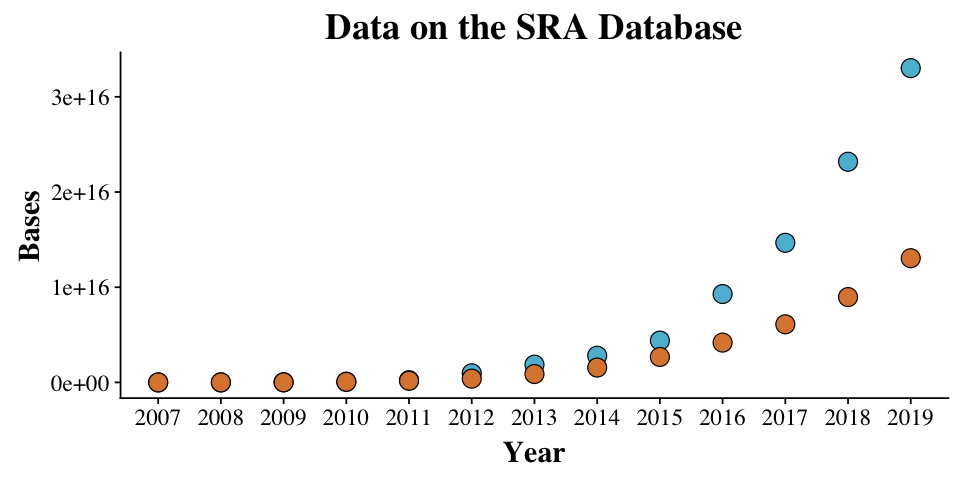

In [13]:
options(repr.plot.width=8, repr.plot.height=4)
sra_plot_oa <- ggplot(maxbases_year, aes(year, maxbases)) +
                ylab("Bases") + xlab("Year") +
                ggtitle("Data on the SRA Database") +
                geom_point(size=5, shape=21,color="black", fill="#5BBCD6") + 
                geom_point(data=maxbases_year, aes(year, open_access_maxbases), 
                           size=5, shape=21,color="black", fill="#DC863B") + 
                theme_cowplot() +
            theme(plot.title = element_text(size = 22, hjust = 0.5, family="Times"),
                  title = element_text(family="Times", face = "bold"), 
                  axis.title = element_text(size = 18, family="Times", face = "bold"), 
                  axis.text = element_text(size = 14, family="Times"),
                  legend.title = element_text(family="Times"),
                  legend.text = element_text(family="Times")) +
            theme(panel.background = element_rect(fill = "transparent"), 
                  plot.background = element_rect(fill = "transparent", color = NA),
                  legend.key = element_rect(colour = "transparent", fill = "transparent"),
                  legend.background = element_rect(fill = "transparent"), 
                  legend.box.background = element_rect(fill = "transparent"))

sra_plot_oa

In [15]:
ggsave(sra_plot_oa, width = 8, height = 4,
       filename = "./figures/sra_open_access_bases_plot.pdf", 
       bg = "transparent")

ggsave(sra_plot_oa, width = 8, height = 4,
       filename = "./figures/sra_open_access_bases_plot.png", 
       bg = "transparent")